## In this problem we will be using Machine Learning to predict if any person is suffering from heart disease or not.We be also performing Anaylsis on the dataset

## importing libraries



The data set contains:
<ul>
<li>age</li>
<li>sex</li>
<li>chest pain type (4 values)</li>
<li>resting blood pressure</li>
<li>serum cholestoral in mg/dl</li>
<li>fasting blood sugar > 120 mg/dl</li>
<li>resting electrocardiographic results (values 0,1,2)</li>
<li>maximum heart rate achieved</li>
<li>exercise induced angina</li>
<li>oldpeak = ST depression induced by exercise relative to rest</li>
<li>the slope of the peak exercise ST segment</li>
<li>number of major vessels </li>
<li>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect</li>
<li> Target : <br>
1 has a heart disease <br>
0 : not has a heart disease </br>

## Hardware requriments
The hardware requirements for data analysis depend on the size and complexity of the dataset, as well as the specific tools and software being used for analysis. Here are some general guidelines:

RAM: The amount of RAM required depends on the size of the dataset you are working with. A general rule of thumb is to have at least 8GB of RAM for small to medium datasets (up to a few GB), and 16GB or more for larger datasets.

CPU: A multi-core CPU is recommended for faster processing of data. Intel Core i5 or i7, or AMD Ryzen 5 or 7 processors are commonly used for data analysis.

Storage: Depending on the size of the dataset, you may need a large amount of storage space. It is recommended to use solid-state drives (SSDs) for faster read and write speeds.

Graphics Card: A dedicated graphics card may be useful for visualizing large datasets or running machine learning algorithms. Nvidia GTX or RTX series graphics cards are commonly used for data analysis.

Operating System: Most data analysis tools are available for Windows, MacOS, and Linux operating systems. It is recommended to have the latest version of the operating system for optimal performance.

Software: Popular software for data analysis includes Python (with libraries like Pandas, Numpy, Matplotlib, etc.), R, SQL, and Tableau. You should have the latest version of the software installed and updated regularly.

Internet Connection: A stable internet connection is required for downloading and updating software and libraries, accessing online resources, and collaborating with team members.

These are some general guidelines for hardware requirements for data analysis. However, it is always recommended to check the specific requirements of the software and tools you are using for optimal performance.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Analysing the Dataset 

In [76]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [77]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
data.shape

(303, 14)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [80]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Descriptive statistics 

In [81]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## checking if null values are present in dataset or not

In [82]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## The no of males(1) and female(0) count in the dataset

In [83]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

# Data Visualization
The process of representing data in graphical or pictorial format to gain insights and better understanding. It allows us to visualize complex data and patterns that may not be evident in text or numerical forma


## Data Interpretation
The process of analyzing data to extract meaningful insights and draw conclusions. It involves understanding the underlying patterns and trends in the data and making informed decisions based on those insights. Data interpretation can help identify opportunities for improvement, inform decision-making, and drive business outcomes. It is a crucial step in the data analysis process and often involves the use of statistical techniques and tools.
<ul>
<li>we can see that in this dataset Male group is more</li>
<li>males have a high probabilty of having heart disease over females</li>



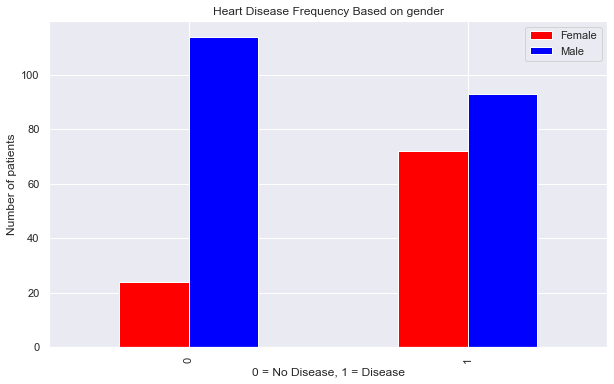

In [84]:
pd.crosstab(data.target, data.sex).plot(kind="bar",figsize=(10, 6),color=["red", "blue"])
plt.title("Heart Disease Frequency Based on gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of patients")
plt.legend(["Female", "Male"]);

## There is a less possibilty of disease after 50 
  

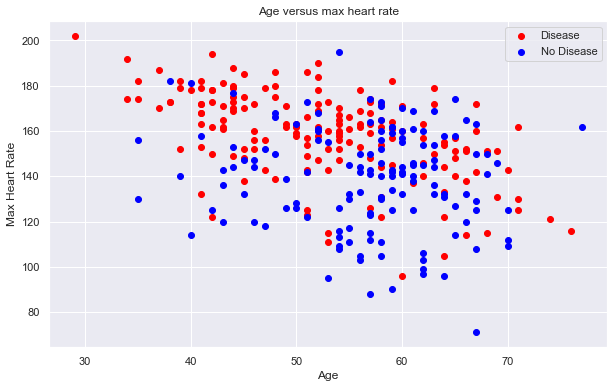

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(data.age[data.target==1],data.thalach[data.target==1],c = "red")
plt.scatter(data.age[data.target==0],data.thalach[data.target==0],c = "blue")
plt.title("Age versus max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

## In the below graph, showing age between 65 to 45
## - we can see that, at 58 there is more number of people
## - lowest at 47 and 49 age

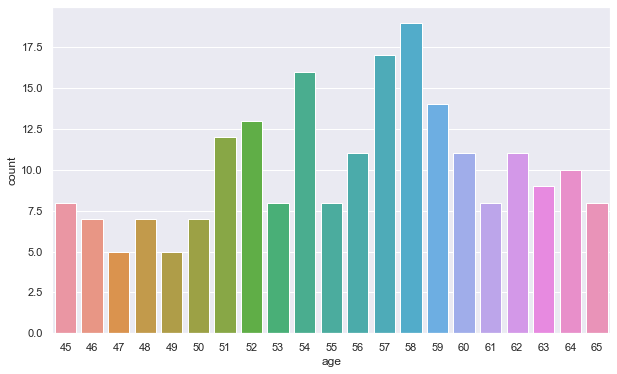

In [86]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='age', data=data[(data['age'] >= 45) & (data['age'] <= 65)], ax=ax)
plt.show()

## In below, graph showing about chest pain types 

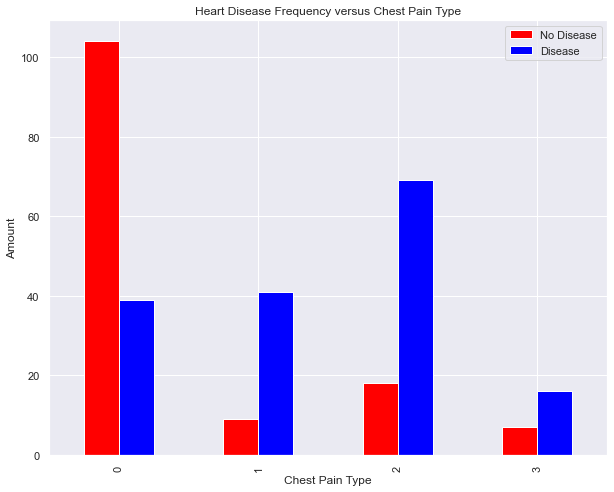

In [87]:
pd.crosstab(data.cp, data.target).plot(kind="bar",figsize=(10, 8),color=["red", "blue"])
plt.title("Heart Disease Frequency versus Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])

The target variable in this dataset refers to the presence or absence of heart disease. 
A value of 0 indicates the absence of heart disease, while a value of 1 indicates the presence of heart disease.
When interpreting the data, the target variable can be used to determine the prevalence of heart disease in the dataset, 
and to identify any factors that may be associated with an increased risk of heart disease. 

<AxesSubplot:xlabel='target', ylabel='count'>

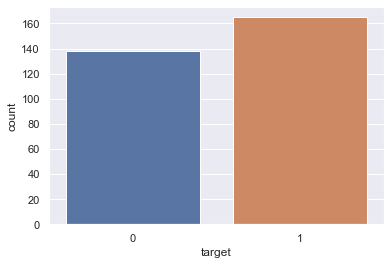

In [88]:
sns.set_style('darkgrid')
figsize=(20, 16)
sns.countplot(x='target',data=data)

## Regex Opeartions

Regular expressions (regex) are a powerful tool for pattern matching and text manipulation. They are widely used in various fields such as data science, software development, natural language processing, and more. Here are some examples of the uses of regex operations:

Data cleaning: Regular expressions can help to clean and preprocess data by removing or modifying unwanted characters, words, or patterns.
Data validation: Regular expressions can be used to validate and extract specific patterns or formats from data, such as email addresses, phone numbers, or dates.

Text search and manipulation: Regular expressions can help to search and replace specific text patterns or substrings in a text document or a dataset.

## Extracting all rows where the thal column contains the string "3":

In [89]:
data[data['thal'] == 3]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


## Extracting all rows where the "cp" column contains either "1" or "2":

In [65]:
import re
cp_pattern = r"^[12]$"
data_cp_12 = data[data["cp"].astype(str).str.contains(cp_pattern)]
print(data_cp_12)

     age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1     37    male   2       130   250    0        1      187      0      3.5   
2     41  female   1       130   204    0        0      172      0      1.4   
3     56    male   1       120   236    0        1      178      0      0.8   
6     56  female   1       140   294    0        0      153      0      1.3   
7     44    male   1       120   263    0        1      173      0      0.0   
..   ...     ...  ..       ...   ...  ...      ...      ...    ...      ...   
278   58  female   1       136   319    1        0      152      0      0.0   
282   59    male   2       126   218    1        1      134      0      2.2   
287   57    male   1       154   232    0        0      164      0      0.0   
293   67    male   2       152   212    0        0      150      0      0.8   
302   57  female   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
1        0   0     2

## Searching for all rows where the "oldpeak" column contains a decimal value between 1.0 and 2.0:

In [72]:
import re

oldpeak_pattern = r"^1\.[0-9]|^2\.0$"
data['oldpeak'] = data['oldpeak'].astype(str)
data_oldpeak = data[data["oldpeak"].str.contains(oldpeak_pattern)]
print(data_oldpeak)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang oldpeak  \
2     41  0e0   1       130   204    0        0      172      0     1.4   
6     56  0e0   1       140   294    0        0      153      0     1.3   
9     57    0   2       150   168    0        1      174      0     1.6   
10    54    0   0       140   239    0        1      160      0     1.2   
13    64    0   3       110   211    0        0      144      1     1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...     ...   
285   46    0   0       140   311    0        1      120      1     1.8   
289   55  0e0   0       128   205    0        2      130      1     2.0   
297   59    0   0       164   176    1        0       90      0     1.0   
299   45    0   3       110   264    0        1      132      0     1.2   
301   57    0   0       130   131    0        1      115      1     1.2   

     slope  ca  thal  target  
2        2   0     2       1  
6        1   0     2       1  
9     

## Separating attributes

In [24]:
dataset = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

## Standardization 

- Standardization is a preprocessing technique in data analysis that is used to transform data to have a mean of zero and a standard deviation of one. This is typically done to bring all features onto the same scale so that they can be easily compared and analyzed together.

The main reasons for doing standardization are:

- To normalize the range of features: If the features have different scales, it can be difficult to compare them and interpret the results. By standardizing the features, they are all on the same scale and can be easily compared.

- To help improve model performance: Many machine learning algorithms perform better when the input features are standardized. Standardization can help to prevent features with larger scales from dominating the learning process.

- To avoid numerical difficulties: Standardizing the data can help to avoid numerical difficulties that can occur when working with data that has very large or very small values.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [26]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


## spliting the dataset x and y

In [27]:
x = dataset.drop(['target'], axis = 1)
y = dataset['target']

- Four different classification models (K-Nearest Neighbors, Decision Tree, Random Forest, and Logistic Regression) are 
  initialized and appended to a list of models.
- Stratified K-Fold cross-validation technique is used to split the dataset into 10 folds (subsets) of equal size, 
  preserving the percentage of samples for each class.
- The models are evaluated using the cross_val_score function from scikit-learn, 
  which trains the model on the training set of each fold and tests it on the test set of that fold. 
- The accuracy score is used as the evaluation metric.
- The mean and standard deviation of the accuracy scores for each model are printed. 
- The mean accuracy score represents the overall performance of the model, 
  while the standard deviation gives an idea of how much the accuracy varies across different folds.

In [99]:
from sklearn.model_selection import StratifiedKFold
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))

results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.822043 (0.050882)
DT: 0.723011 (0.058317)
RF: 0.821720 (0.047565)
LR: 0.851398 (0.056159)


- The boxplot shows the distribution of accuracy scores for each algorithm across 10 cross-validation splits. 
- The box represents the interquartile range (IQR) of the data (i.e., the middle 50% of the data), 
  with the line inside the box indicating the median. 
- The whiskers extend to the minimum and maximum values that fall within 1.5 times the IQR. 
- Any points outside the whiskers are considered outliers. 
- The boxplot allows us to visually compare the performance of the different algorithms 
  and identify any outliers or variability in the results.

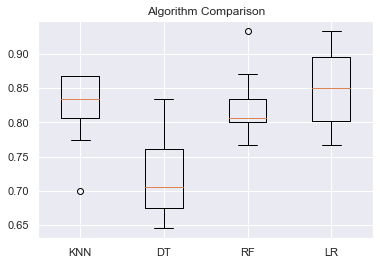

In [100]:
from matplotlib import pyplot
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In this project I have analysed the data . I have applied diffrent algorithms to find the best fitting model.
Hence Logistic regression gives the best accuray that is 85%.